In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df=pd.read_csv('C:\\Users\\arnab\\OneDrive\\Desktop\\git_project\\DS Projects\\Heart-Disease-Prediction\\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


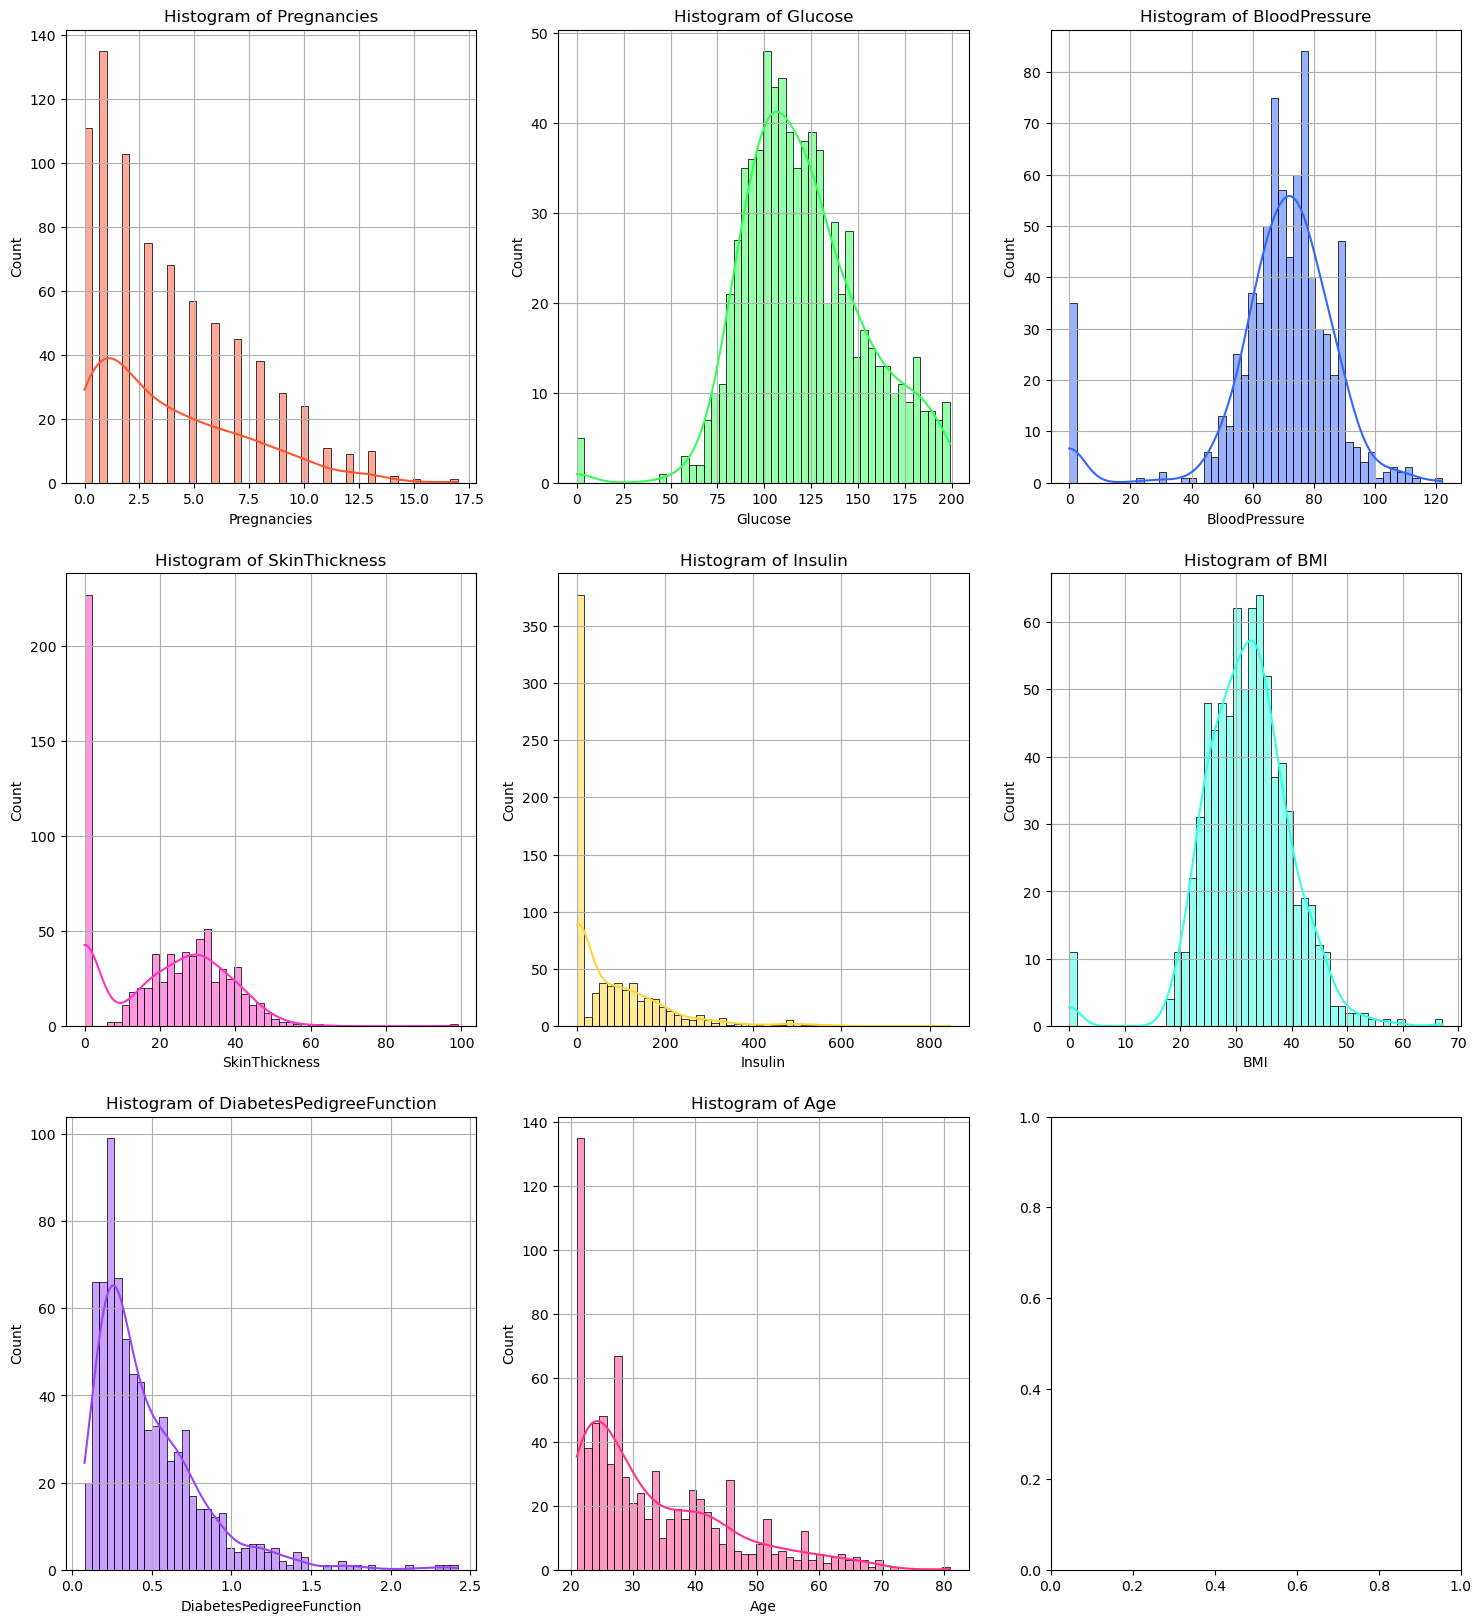

In [6]:
fig,axes=plt.subplots(3,3,figsize=(18,20))
colors=['#FF5733','#33FF57','#3366FF','#FF33C2','#FFD733','#33FFE2','#9944FF','#FF3389']
for i,ax in enumerate(axes.flatten()):
    if i>=len(df.columns)-1:
        break
    sns.histplot(data=df,x=df[df.columns[i]],bins=50,ax=ax,color=colors[i],kde=True)
    ax.set(xlabel=df.columns[i])
    ax.set_title(f'Histogram of {df.columns[i]}')
    ax.grid(True)

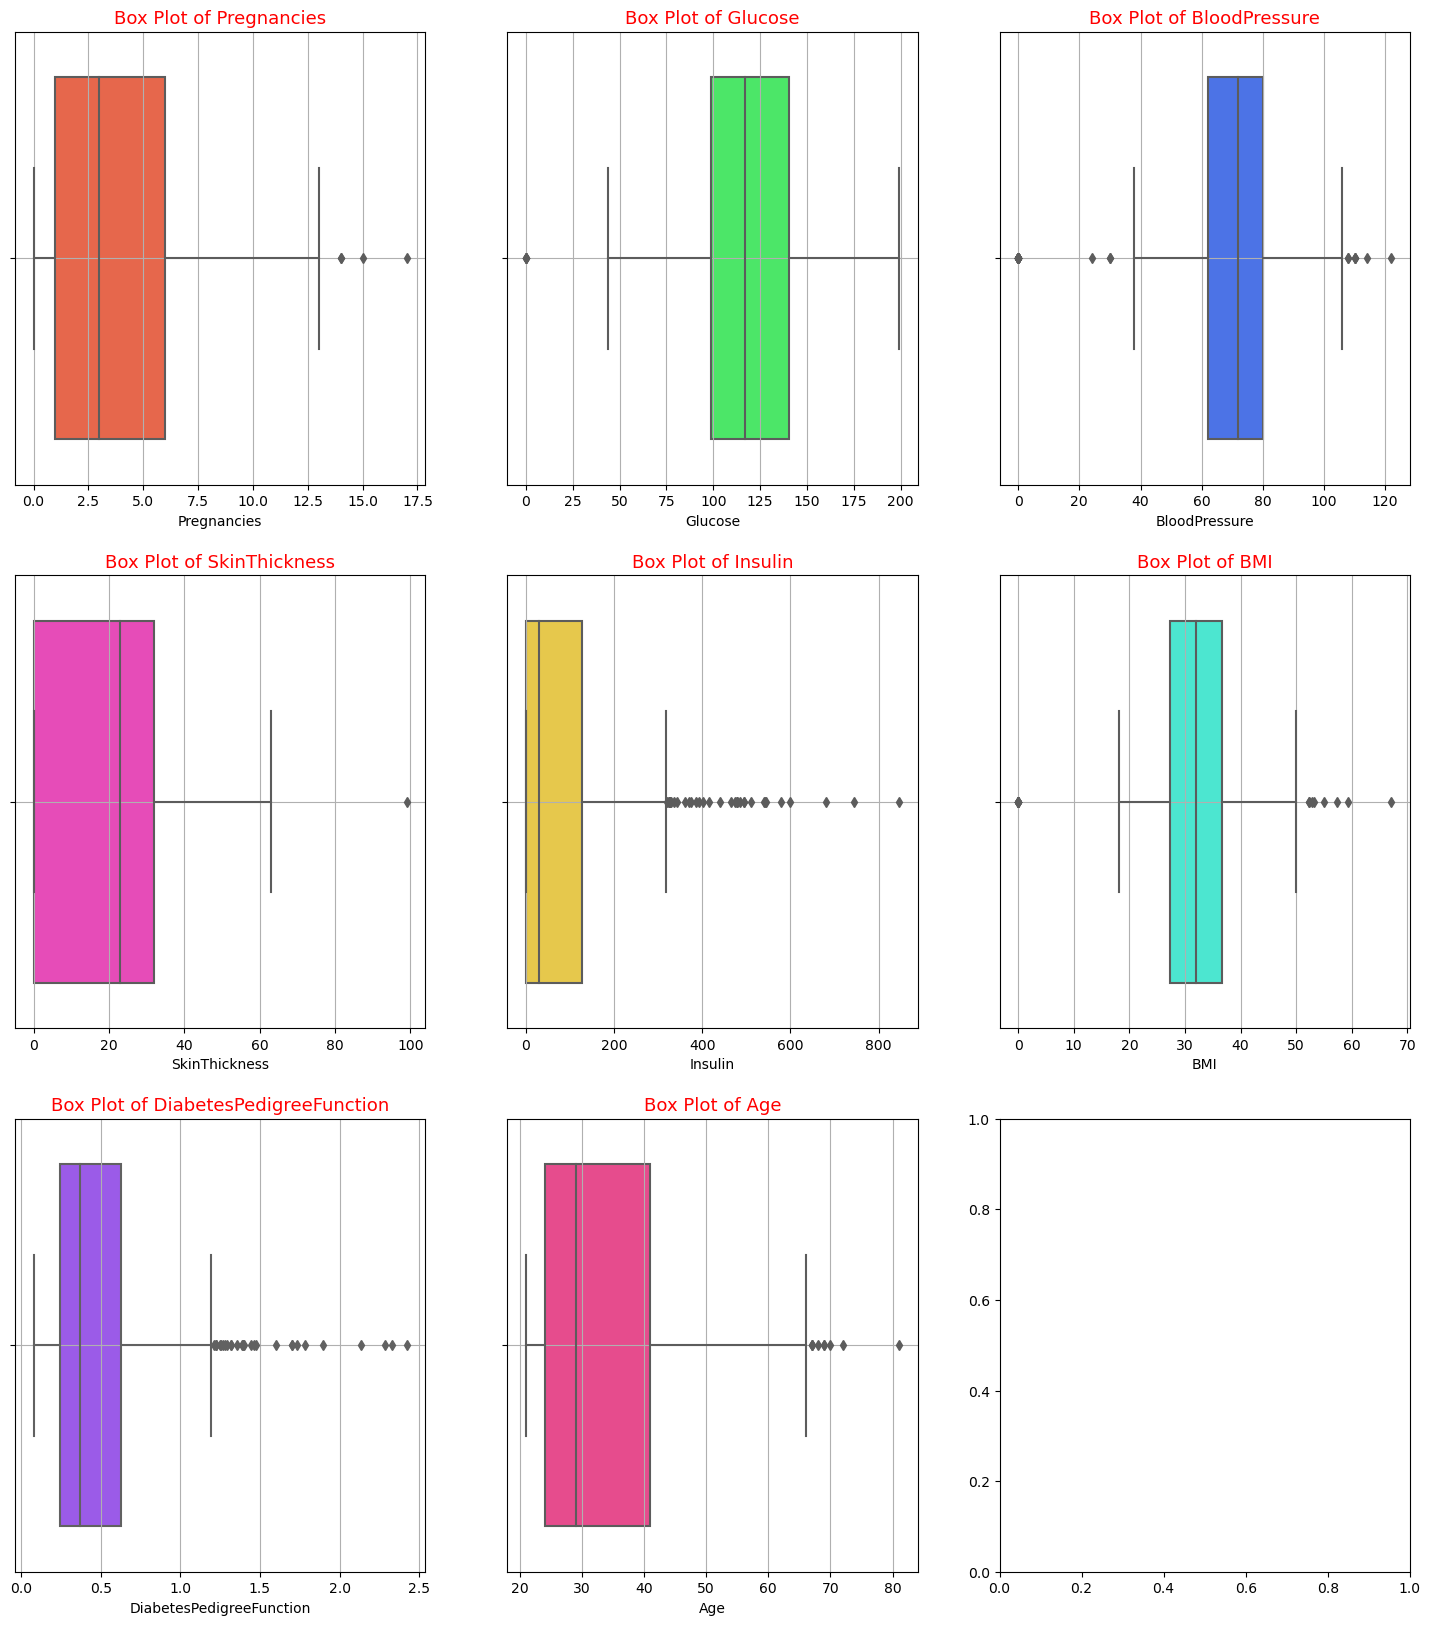

In [7]:
fig,axes=plt.subplots(3,3,figsize=(18,20))
for i,ax in enumerate(axes.flatten()):
    if i>=len(df.columns)-1:
        break
    sns.boxplot(data=df,x=df[df.columns[i]],color=colors[i],ax=ax)
    ax.set_title(f'Box Plot of {df.columns[i]}',color='red',fontsize=13)
    ax.grid(True)
                                

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

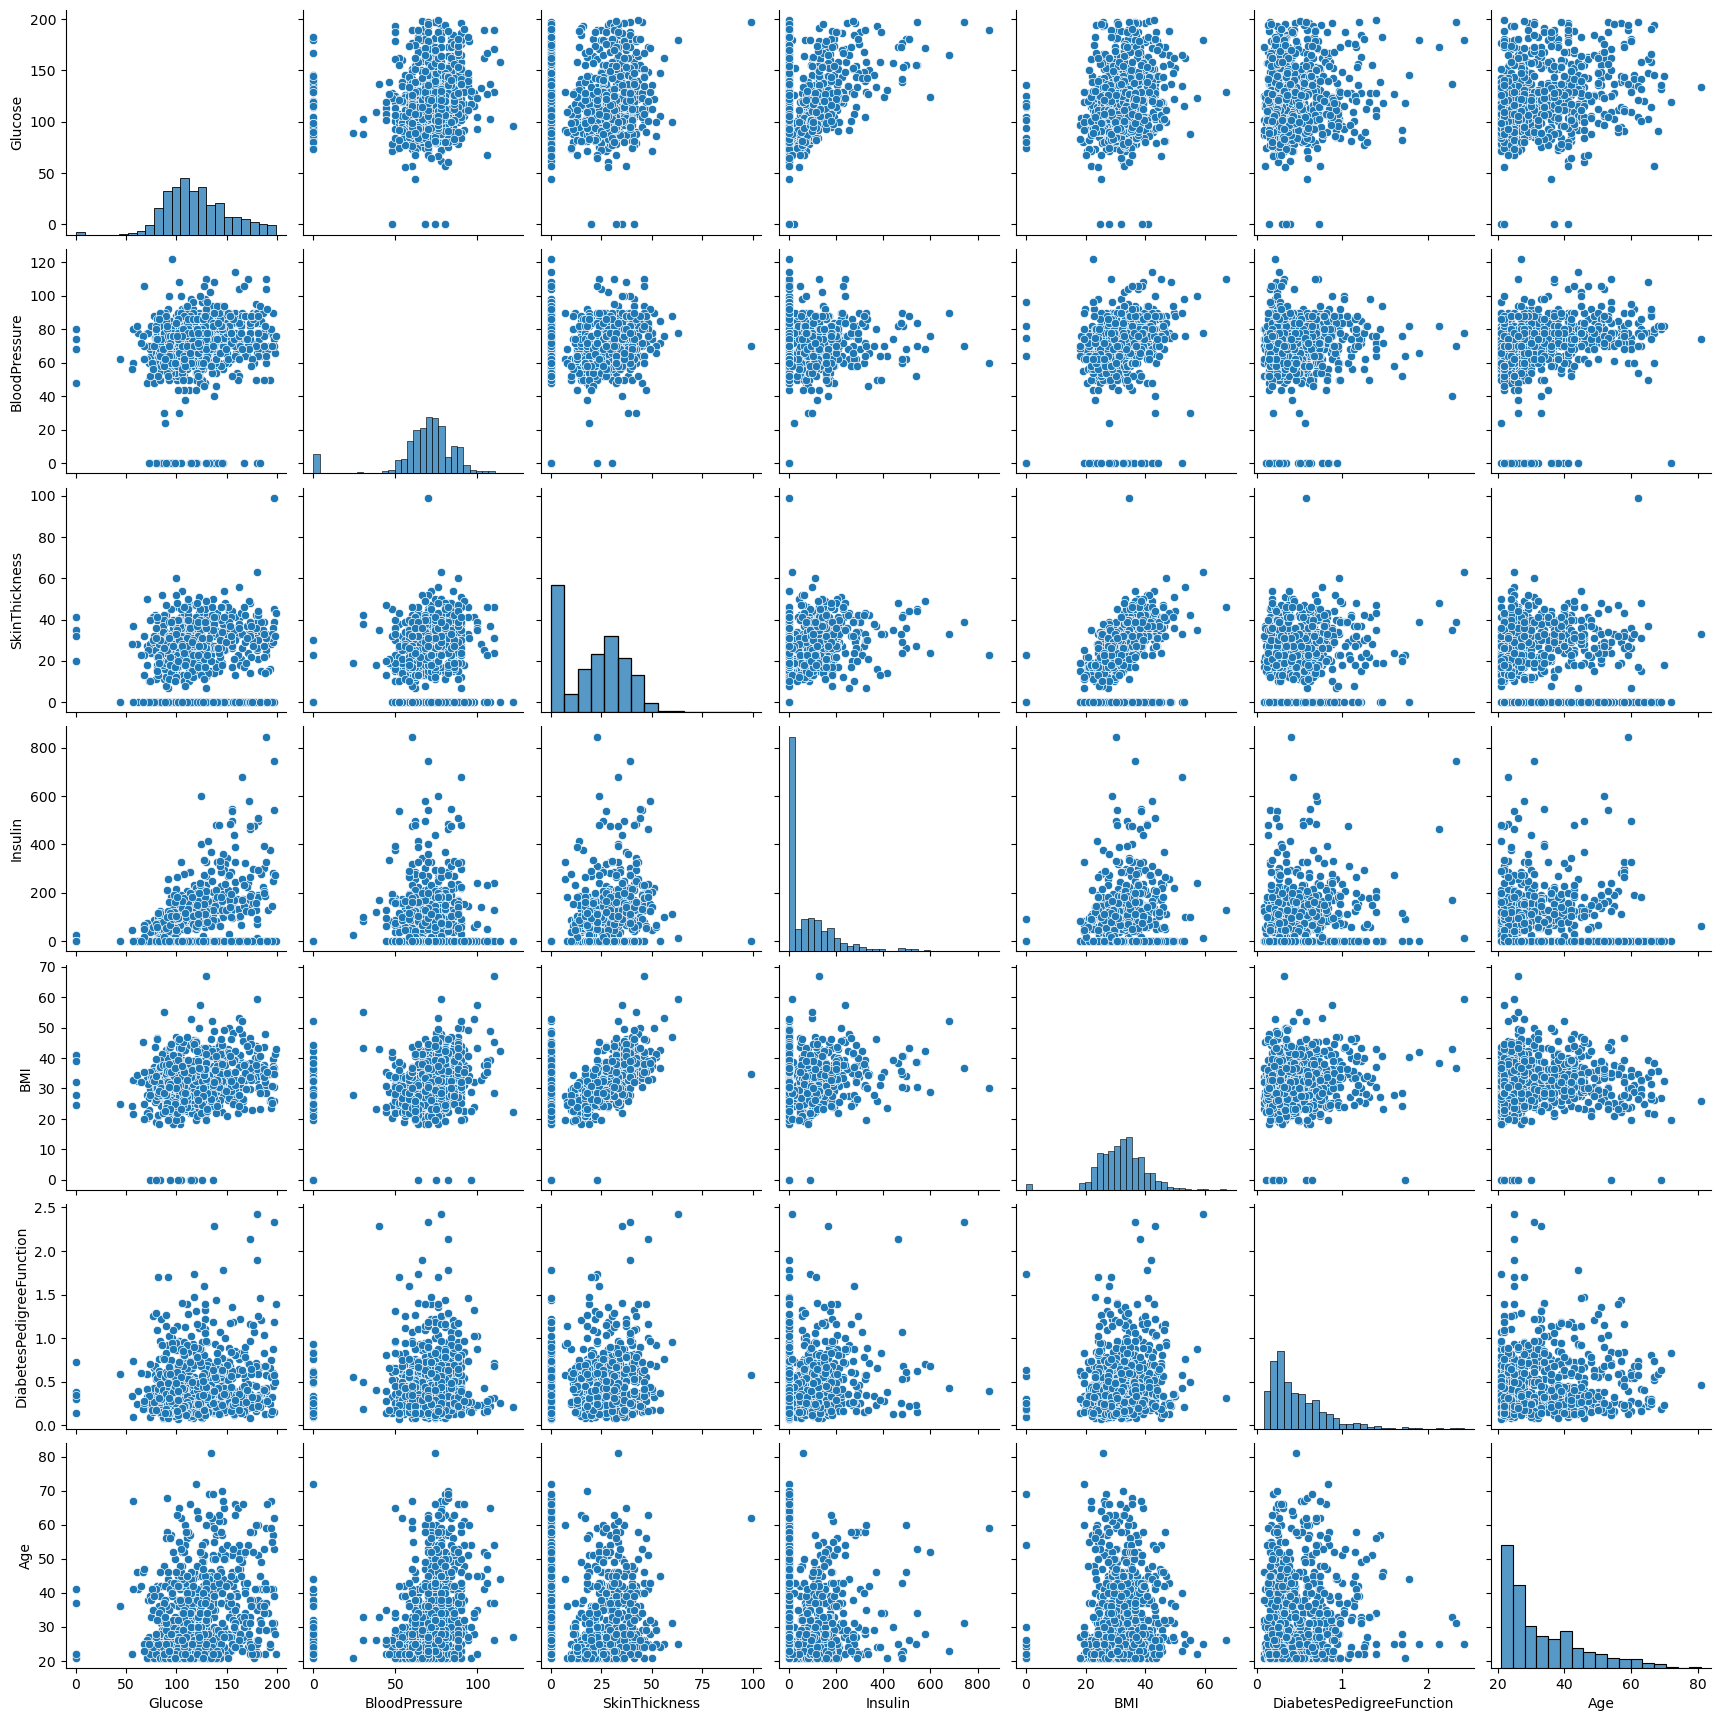

In [9]:
sns.pairplot(df.loc[:,['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])

In [10]:
Correlation=df.loc[:,['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].corr()
Cm=sns.light_palette('purple',as_cmap=True)
Correlation.style.background_gradient(cmap=Cm)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Glucose,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


In [11]:
X=df.iloc[:,:len(df.columns)-1]
Y=df['Outcome']

In [12]:
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


**Feature Importance**

<AxesSubplot:>

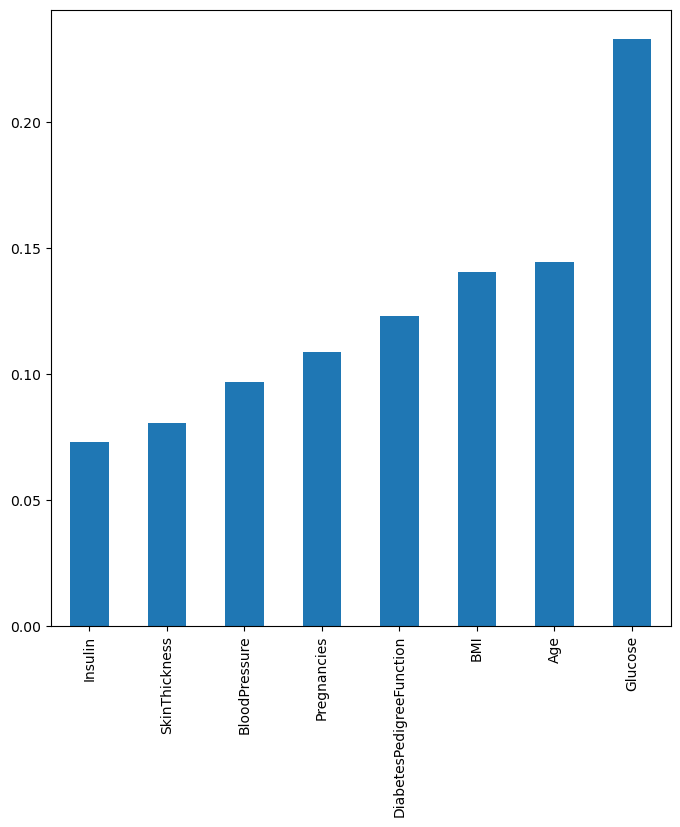

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
ETC=ExtraTreesClassifier()
ETC.fit(X,Y)
df_new=pd.Series(ETC.feature_importances_,index=X.columns)
plt.figure(figsize=(8,8))
df_new.sort_values().plot(kind='bar')

In [14]:
Q1=df['Glucose'].quantile(.25)
Q3=df['Glucose'].quantile(.75)
IQR=Q3-Q1
lower_b=Q1-1.5*IQR
upper_b=Q3+1.5*IQR
Df=df[df['Glucose'].between(lower_b,upper_b,inclusive='neither')]
Df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
x=df.loc[:,Df.columns!='Outcome']
y=df['Outcome']

In [16]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [17]:
LE=LabelEncoder()
Df['Pregnancies']=LE.fit_transform(Df['Pregnancies'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=15)
SC=StandardScaler()
Xtrain=SC.fit_transform(x_train)
Xtest=SC.fit_transform(x_test)
Lr=LogisticRegression()
Lr.fit(x_train,y_train)
Y_pr=Lr.predict(x_test)
print(classification_report(y_test,Y_pr))
Ac_Lr=accuracy_score(y_test,Y_pr)
print(Ac_Lr)
print(confusion_matrix(y_test,Y_pr))
Com=pd.DataFrame(np.c_[y_test,Y_pr],columns=['Original','Predicted'])
Com

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       129
           1       0.63      0.57      0.60        63

    accuracy                           0.75       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.74      0.75      0.75       192

0.75
[[108  21]
 [ 27  36]]


C:\Users\arnab\AppData\Local\Temp\ipykernel_26180\2932759787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['Pregnancies']=LE.fit_transform(Df['Pregnancies'])
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Original,Predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
187,0,0
188,1,1
189,1,1
190,0,0


**Decision Tree**

In [18]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
Y_Pr_dec=DT.predict(x_test)
Com_dec=pd.DataFrame(np.c_[y_test,Y_Pr_dec],columns=['Original','Predicted'])
print(classification_report(y_test,Y_Pr_dec))
Ac_DT=accuracy_score(y_test,Y_Pr_dec)
print(Ac_DT)
print(confusion_matrix(y_test,Y_Pr_dec))
Com_dec

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       129
           1       0.55      0.56      0.55        63

    accuracy                           0.70       192
   macro avg       0.66      0.67      0.66       192
weighted avg       0.70      0.70      0.70       192

0.703125
[[100  29]
 [ 28  35]]


,Original,Predicted
0,0,0
1,0,1
2,0,0
3,1,0
4,0,0
...,...,...
187,0,0
188,1,1
189,1,1
190,0,0


**Random Forest**

In [19]:
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier(n_estimators=900)
Rf.fit(x_train,y_train)
Y_Predd=Rf.predict(x_test)
Ne_Table=pd.DataFrame(np.c_[y_test,Y_Predd],columns=['Original','Predicted'])
print(classification_report(y_test,Y_Predd))
Ac_RF=accuracy_score(y_test,Y_Predd)
print(Ac_RF)
print(confusion_matrix(y_test,Y_Predd),'is Confusion Matrix')
Ne_Table

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       129
           1       0.63      0.57      0.60        63

    accuracy                           0.75       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.74      0.75      0.75       192

0.75
[[108  21]
 [ 27  36]] is Confusion Matrix


,Original,Predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
187,0,0
188,1,1
189,1,1
190,0,0


**Extra Tree Classifier**

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
Et=ExtraTreesClassifier(n_estimators=900,random_state=10)
Et.fit(x_train,y_train)
y_PreD=Et.predict(x_test)
n_table=pd.DataFrame(np.c_[y_test,y_PreD],columns=['original','Prediction'])
Ac_EBC=accuracy_score(y_test,y_PreD)
print(Ac_EBC)
print(classification_report(y_test,y_PreD))
Com1=pd.DataFrame(np.c_[y_test,y_PreD],columns=['Original','Prediction'])
Com1

0.7552083333333334
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       129
           1       0.64      0.57      0.61        63

    accuracy                           0.76       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.75      0.76      0.75       192



,Original,Prediction
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
187,0,0
188,1,1
189,1,1
190,0,0


**Bagging Classifier**

In [21]:
from sklearn.ensemble import BaggingClassifier
bagg_cl=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=55)
bagg_cl.fit(x_train,y_train)
Y1_Pred=bagg_cl.predict(x_test)
new_table=pd.DataFrame(np.c_[y_test,Y1_Pred],columns=['Original','Predicted'])
Ac_BC=accuracy_score(y_test,Y1_Pred)
print('Accuracy Score is: ',Ac_BC)
print(classification_report(y_test,Y1_Pred),'Classification Report.')
new_table

Accuracy Score is:  0.7552083333333334
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       129
           1       0.63      0.60      0.62        63

    accuracy                           0.76       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.75      0.76      0.75       192
 Classification Report.


,Original,Predicted
0,0,0
1,0,1
2,0,0
3,1,1
4,0,0
...,...,...
187,0,0
188,1,1
189,1,1
190,0,0


**K-Nearest Neighbors**

In [22]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)
y1_PrEd=KNN.predict(x_test)
new_table1=pd.DataFrame(np.c_[y_test,y1_PrEd],columns=['Original','Predicted'])
Ac_KN=accuracy_score(y_test,y1_PrEd)
print('Accuracy Score is: ',Ac_KN)
print(classification_report(y_test,y1_PrEd),'Classification Report.')
new_table1

Accuracy Score is:  0.71875
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       129
           1       0.58      0.54      0.56        63

    accuracy                           0.72       192
   macro avg       0.68      0.67      0.68       192
weighted avg       0.71      0.72      0.72       192
 Classification Report.


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Original,Predicted
0,0,1
1,0,1
2,0,0
3,1,0
4,0,0
...,...,...
187,0,1
188,1,1
189,1,1
190,0,0


**Naive Bayes**

In [23]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(x_train,y_train)
Y_P_NB=NB.predict(x_test)
new_table2=pd.DataFrame(np.c_[y_test,Y_P_NB],columns=['Original','Predicted'])
Ac_NB=accuracy_score(y_test,Y_P_NB)
print('Accuracy Score is: ',Ac_NB)
print(classification_report(y_test,Y_P_NB),'Classification Report.')
new_table2

Accuracy Score is:  0.7239583333333334
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       129
           1       0.58      0.59      0.58        63

    accuracy                           0.72       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.73      0.72      0.72       192
 Classification Report.


,Original,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
187,0,0
188,1,1
189,1,1
190,0,0


**SVM**

In [24]:
from sklearn.svm import SVC
SVM=SVC()
SVM.fit(x_train,y_train)
y_Pr_svm=SVM.predict(x_test)
new_table3=pd.DataFrame(np.c_[y_test,y_Pr_svm],columns=['original','Predicted'])
Ac_SVM=accuracy_score(y_test,y_Pr_svm)
print('Accuracy Score is: ',Ac_SVM)
print(classification_report(y_test,y_Pr_svm))
new_table3

Accuracy Score is:  0.765625
              precision    recall  f1-score   support

           0       0.80      0.88      0.83       129
           1       0.68      0.54      0.60        63

    accuracy                           0.77       192
   macro avg       0.74      0.71      0.72       192
weighted avg       0.76      0.77      0.76       192



,original,Predicted
0,0,0
1,0,1
2,0,0
3,1,0
4,0,0
...,...,...
187,0,0
188,1,1
189,1,1
190,0,0


In [25]:
Comparison_Model_data=pd.DataFrame(np.c_[y_test,Y_pr,Y_Pr_dec,Y_Predd,y_PreD,Y1_Pred,y1_PrEd,Y_P_NB,y_Pr_svm],
                                   columns=['Original','LogicticRegression','DecisionTree','RandomForest',
                                            'ExtraBaggingClassifier','BaggingClassifier','KNN','Naive_Bayes','SVM'])
Comparison_Model_data

,Original,LogicticRegression,DecisionTree,RandomForest,ExtraBaggingClassifier,BaggingClassifier,KNN,Naive_Bayes,SVM
0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,1,1,0,1
2,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
187,0,0,0,0,0,0,1,0,0
188,1,1,1,1,1,1,1,1,1
189,1,1,1,1,1,1,1,1,1
190,0,0,0,0,0,0,0,0,0


In [26]:
Accuracy_table=pd.DataFrame({'Classifiers':['LogicticRegression','DecisionTree','RandomForest',
                                            'ExtraBaggingClassifier','BaggingClassifier','KNN',
                                            'Naive_Bayes','SVM'],
                             'Accuracy':[Ac_Lr,Ac_DT,Ac_RF,Ac_EBC,Ac_BC,
                                         Ac_KN,Ac_NB,Ac_SVM]})
Accuracy_table.sort_values(ascending=False,by='Accuracy')

,Classifiers,Accuracy
7,SVM,0.765625
3,ExtraBaggingClassifier,0.755208
4,BaggingClassifier,0.755208
0,LogicticRegression,0.750000
2,RandomForest,0.750000
6,Naive_Bayes,0.723958
5,KNN,0.718750
1,DecisionTree,0.703125


**Hyperparameter Tuning**

**Using DeepLearning**

**Deployment**